**I Can't upload the data in this repo, github accepts files with 100MB Maximum and the size of the training and testing data is 700MB so here is link of the data: https://www.kaggle.com/c/tabular-playground-series-dec-2021**

# Table of Contents
<a id="toc"></a>
- [1. Data Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. Exploaring the Data](#3)
    - [3.1 Exploring Train Data](#3.1)
    - [3.2 Exploring Test Data](#3.2)
- [4. Data Preparation and Analysis](#4)
    - [4.1 Drop Unwanted rows and columns](#4.1)
- [5. Feature Engineering](#5)
- [6. Assign Feature and target variables](#6)
- [7. Modeling usig ANN](#7)
    - [7.1 Build and train ANN](#7.1)
    - [7.2 Loss Curve](#7.2) 
    - [7.3 Confusion Matrix](#7.3)
    - [7.4 Classification Report](#7.4)
- [8. Submission](#8)

<a id="1"></a>
<h1>Data Description</h1><br><br>

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:<br>

1 - Spruce/Fir<br>
2 - Lodgepole Pine<br>
3 - Ponderosa Pine<br>
4 - Cottonwood/Willow<br>
5 - Aspen<br>
6 - Douglas-fir<br>
7 - Krummholz<br>

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).<br>

**Data Fields**:<br>
Elevation - Elevation in meters<br>
Aspect - Aspect in degrees azimuth<br>
Slope - Slope in degrees<br>
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features<br>
Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features<br>
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway<br>
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice<br>
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice<br>
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice<br>
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points<br>
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation<br>
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation<br>
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation<br>

**The wilderness areas are:**<br>

1 - Rawah Wilderness Area<br>
2 - Neota Wilderness Area<br>
3 - Comanche Peak Wilderness Area<br>
4 - Cache la Poudre Wilderness Area<br>

**The soil types are:**<br>

1 Cathedral family - Rock outcrop complex, extremely stony.<br>
2 Vanet - Ratake families complex, very stony.<br>
3 Haploborolis - Rock outcrop complex, rubbly.<br>
4 Ratake family - Rock outcrop complex, rubbly.<br>
5 Vanet family - Rock outcrop complex complex, rubbly.<br>
6 Vanet - Wetmore families - Rock outcrop complex, stony.<br>
7 Gothic family.<br>
8 Supervisor - Limber families complex.<br>
9 Troutville family, very stony.<br>
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
11 Bullwark - Catamount families - Rock land complex, rubbly.<br>
12 Legault family - Rock land complex, stony.<br>
13 Catamount family - Rock land - Bullwark family complex, rubbly.<br>
14 Pachic Argiborolis - Aquolis complex.<br>
15 unspecified in the USFS Soil and ELU Survey.<br>
16 Cryaquolis - Cryoborolis complex.<br>
17 Gateview family - Cryaquolis complex.<br>
18 Rogert family, very stony.<br>
19 Typic Cryaquolis - Borohemists complex.<br>
20 Typic Cryaquepts - Typic Cryaquolls complex.<br>
21 Typic Cryaquolls - Leighcan family, till substratum complex.<br>
22 Leighcan family, till substratum, extremely bouldery.<br>
23 Leighcan family, till substratum - Typic Cryaquolls complex.<br>
24 Leighcan family, extremely stony.<br>
25 Leighcan family, warm, extremely stony.<br>
26 Granile - Catamount families complex, very stony.<br>
27 Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
28 Leighcan family - Rock outcrop complex, extremely stony.<br>
29 Como - Legault families complex, extremely stony.<br>
30 Como family - Rock land - Legault family complex, extremely stony.<br>
31 Leighcan - Catamount families complex, extremely stony.<br>
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>
34 Cryorthents - Rock land complex, extremely stony.<br>
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.<br>
40 Moran family - Cryorthents - Rock land complex, extremely stony.<br>

<a id="2"></a>
# Import Necessaries Libaries

In [119]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import callbacks
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential

import warnings 
warnings.filterwarnings('ignore')

<a id="3"></a>
# Exploaring the data

<a id="3.1"></a>
**Explore Training data**

In [82]:
train = pd.read_csv('train.csv') # read training data

In [83]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,...,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,...,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,...,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,...,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,...,0,0,0,0,0,0,0,0,0,2


In [84]:
train.shape # 4M rows and 56 Features in the training data

(4000000, 56)

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 56 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Id                                  int64
 1   Elevation                           int64
 2   Aspect                              int64
 3   Slope                               int64
 4   Horizontal_Distance_To_Hydrology    int64
 5   Vertical_Distance_To_Hydrology      int64
 6   Horizontal_Distance_To_Roadways     int64
 7   Hillshade_9am                       int64
 8   Hillshade_Noon                      int64
 9   Hillshade_3pm                       int64
 10  Horizontal_Distance_To_Fire_Points  int64
 11  Wilderness_Area1                    int64
 12  Wilderness_Area2                    int64
 13  Wilderness_Area3                    int64
 14  Wilderness_Area4                    int64
 15  Soil_Type1                          int64
 16  Soil_Type2                          

In [86]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,...,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06
mean,2.000000e+06,2.980192e+03,1.515857e+02,1.509754e+01,2.713154e+02,5.166262e+01,1.766642e+03,2.118375e+02,2.210614e+02,1.408109e+02,...,3.746200e-02,3.782075e-02,1.199500e-02,1.605350e-02,1.071275e-02,1.220750e-02,4.075150e-02,3.923925e-02,3.161850e-02,1.771335e+00
std,1.154701e+06,2.890482e+02,1.099611e+02,8.546731e+00,2.265497e+02,6.821597e+01,1.315610e+03,3.075996e+01,2.223134e+01,4.369864e+01,...,1.898910e-01,1.907625e-01,1.088629e-01,1.256813e-01,1.029465e-01,1.098111e-01,1.977140e-01,1.941637e-01,1.749822e-01,8.938060e-01
min,0.000000e+00,1.773000e+03,-3.300000e+01,-3.000000e+00,-9.200000e+01,-3.170000e+02,-2.870000e+02,-4.000000e+00,4.900000e+01,-5.300000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,9.999998e+05,2.760000e+03,6.000000e+01,9.000000e+00,1.100000e+02,4.000000e+00,8.220000e+02,1.980000e+02,2.100000e+02,1.150000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.000000e+06,2.966000e+03,1.230000e+02,1.400000e+01,2.130000e+02,3.100000e+01,1.436000e+03,2.180000e+02,2.240000e+02,1.420000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
75%,2.999999e+06,3.217000e+03,2.470000e+02,2.000000e+01,3.610000e+02,7.800000e+01,2.365000e+03,2.330000e+02,2.370000e+02,1.690000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
max,3.999999e+06,4.383000e+03,4.070000e+02,6.400000e+01,1.602000e+03,6.470000e+02,7.666000e+03,3.010000e+02,2.790000e+02,2.720000e+02,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00


In [87]:
train.columns[train.isna().any()]

Index([], dtype='object')

In [88]:
train.nunique()

Id                                    4000000
Elevation                                2525
Aspect                                    440
Slope                                      68
Horizontal_Distance_To_Hydrology         1636
Vertical_Distance_To_Hydrology            916
Horizontal_Distance_To_Roadways          7760
Hillshade_9am                             301
Hillshade_Noon                            221
Hillshade_3pm                             326
Horizontal_Distance_To_Fire_Points       8112
Wilderness_Area1                            2
Wilderness_Area2                            2
Wilderness_Area3                            2
Wilderness_Area4                            2
Soil_Type1                                  2
Soil_Type2                                  2
Soil_Type3                                  2
Soil_Type4                                  2
Soil_Type5                                  2
Soil_Type6                                  2
Soil_Type7                        

In [89]:
train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

<a id='3.2'></a>
**Exploring Testing Data**

In [90]:
test = pd.read_csv('test.csv')  # read testing data

In [91]:
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,4000000,2763,78,20,377,88,3104,218,213,195,...,0,0,0,0,0,0,0,0,0,0
1,4000001,2826,153,11,264,39,295,219,238,148,...,0,0,0,0,0,0,0,0,0,0
2,4000002,2948,57,19,56,44,852,202,217,163,...,0,0,1,0,0,0,0,0,0,0
3,4000003,2926,119,6,158,134,2136,234,240,142,...,0,0,0,0,0,0,0,0,0,0
4,4000004,2690,10,4,38,108,3589,213,221,229,...,0,0,0,0,0,0,0,0,0,0


In [92]:
test.shape # 1M rows and 55 Features in the testing data

(1000000, 55)

In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 55 columns):
 #   Column                              Non-Null Count    Dtype
---  ------                              --------------    -----
 0   Id                                  1000000 non-null  int64
 1   Elevation                           1000000 non-null  int64
 2   Aspect                              1000000 non-null  int64
 3   Slope                               1000000 non-null  int64
 4   Horizontal_Distance_To_Hydrology    1000000 non-null  int64
 5   Vertical_Distance_To_Hydrology      1000000 non-null  int64
 6   Horizontal_Distance_To_Roadways     1000000 non-null  int64
 7   Hillshade_9am                       1000000 non-null  int64
 8   Hillshade_Noon                      1000000 non-null  int64
 9   Hillshade_3pm                       1000000 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  1000000 non-null  int64
 11  Wilderness_Area1                    10

In [94]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,...,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06
mean,2.000000e+06,2.980192e+03,1.515857e+02,1.509754e+01,2.713154e+02,5.166262e+01,1.766642e+03,2.118375e+02,2.210614e+02,1.408109e+02,...,3.746200e-02,3.782075e-02,1.199500e-02,1.605350e-02,1.071275e-02,1.220750e-02,4.075150e-02,3.923925e-02,3.161850e-02,1.771335e+00
std,1.154701e+06,2.890482e+02,1.099611e+02,8.546731e+00,2.265497e+02,6.821597e+01,1.315610e+03,3.075996e+01,2.223134e+01,4.369864e+01,...,1.898910e-01,1.907625e-01,1.088629e-01,1.256813e-01,1.029465e-01,1.098111e-01,1.977140e-01,1.941637e-01,1.749822e-01,8.938060e-01
min,0.000000e+00,1.773000e+03,-3.300000e+01,-3.000000e+00,-9.200000e+01,-3.170000e+02,-2.870000e+02,-4.000000e+00,4.900000e+01,-5.300000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,9.999998e+05,2.760000e+03,6.000000e+01,9.000000e+00,1.100000e+02,4.000000e+00,8.220000e+02,1.980000e+02,2.100000e+02,1.150000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.000000e+06,2.966000e+03,1.230000e+02,1.400000e+01,2.130000e+02,3.100000e+01,1.436000e+03,2.180000e+02,2.240000e+02,1.420000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
75%,2.999999e+06,3.217000e+03,2.470000e+02,2.000000e+01,3.610000e+02,7.800000e+01,2.365000e+03,2.330000e+02,2.370000e+02,1.690000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
max,3.999999e+06,4.383000e+03,4.070000e+02,6.400000e+01,1.602000e+03,6.470000e+02,7.666000e+03,3.010000e+02,2.790000e+02,2.720000e+02,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00


In [95]:
test.columns[test.isna().any()]

Index([], dtype='object')

In [96]:
test.nunique()

Id                                    1000000
Elevation                                2488
Aspect                                    433
Slope                                      67
Horizontal_Distance_To_Hydrology         1612
Vertical_Distance_To_Hydrology            858
Horizontal_Distance_To_Roadways          7576
Hillshade_9am                             280
Hillshade_Noon                            218
Hillshade_3pm                             320
Horizontal_Distance_To_Fire_Points       7929
Wilderness_Area1                            2
Wilderness_Area2                            2
Wilderness_Area3                            2
Wilderness_Area4                            2
Soil_Type1                                  2
Soil_Type2                                  2
Soil_Type3                                  2
Soil_Type4                                  2
Soil_Type5                                  2
Soil_Type6                                  2
Soil_Type7                        

In [97]:
test.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

<a id = '4'></a>
# Data Preparation and Analysis

In [98]:
train.drop(["Id"] , axis = 1 , inplace = True)
test.drop(["Id"] , axis = 1 , inplace = True)

In [99]:
FEATURES = [col for col in train.columns if col not in ['id', 'Cover_Type']]

In [100]:
FEATURES

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [101]:
df = pd.concat([train[FEATURES], test[FEATURES]], axis=0)
cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25]

In [102]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,3189,40,8,30,13,3270,206,234,193,4873,...,0,0,0,0,0,0,0,0,0,0
1,3026,182,5,280,29,3270,233,240,106,5423,...,0,0,0,0,0,0,0,0,0,0
2,3106,13,7,351,37,2914,208,234,137,5269,...,0,0,0,0,0,0,0,0,0,0
3,3022,276,13,192,16,3034,207,238,156,2866,...,0,0,0,0,0,0,0,0,0,0
4,2906,186,13,266,22,2916,231,231,154,2642,...,0,0,0,0,0,0,0,0,0,0


In [103]:
df.shape

(5000000, 54)

In [104]:
del df

In [105]:
cat_features

['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [106]:
cont_features

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [28]:
train.Cover_Type.value_counts()

2    2262087
1    1468136
3     195712
7      62261
6      11426
4        377
5          1
Name: Cover_Type, dtype: int64

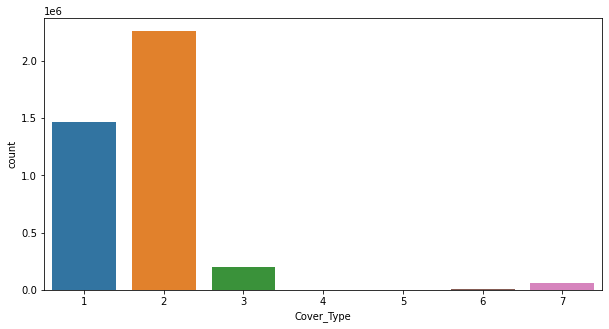

In [29]:
# count plot for the target variable
plt.figure(figsize=(10,5))
sns.countplot(x='Cover_Type', data=train);

**There is only 1 row of class 5**

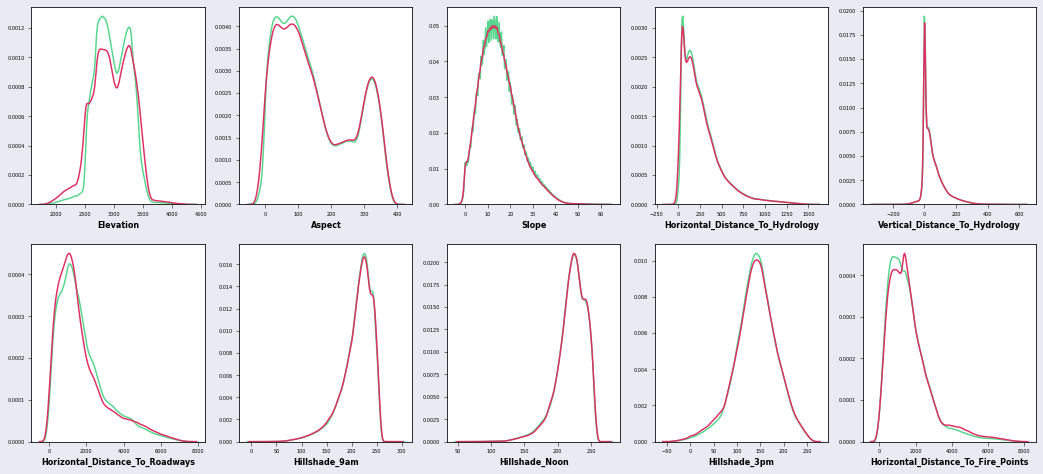

In [21]:
# distrbution of the continous features
ncols = 5
nrows = int(len(cont_features) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 8), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.kdeplot(x=train[col], ax=axes[r, c], color='#58D68D', label='Train data')
        sns.kdeplot(x=test[col], ax=axes[r, c], color='#DE3163', label='Test data')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

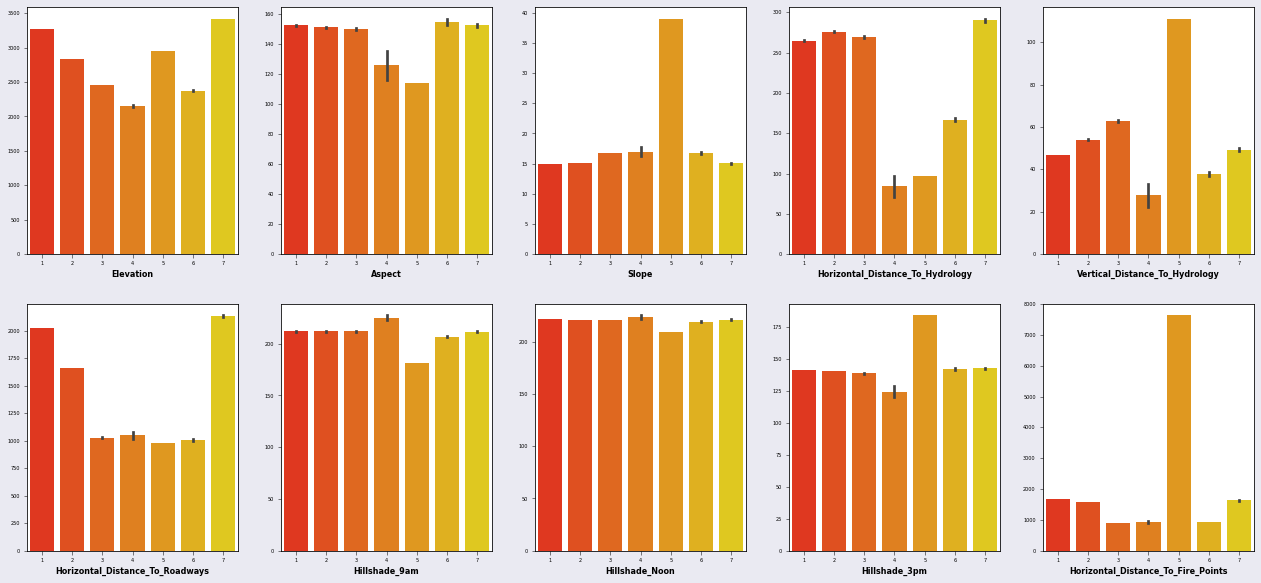

In [22]:
# barplot of the categorical features (y-axis) and target variable (x-axis)
ncols = 5
nrows = int(len(cont_features) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.barplot(y=train[col], x=train['Cover_Type'], ax=axes[r, c], palette='autumn', label='Train data')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

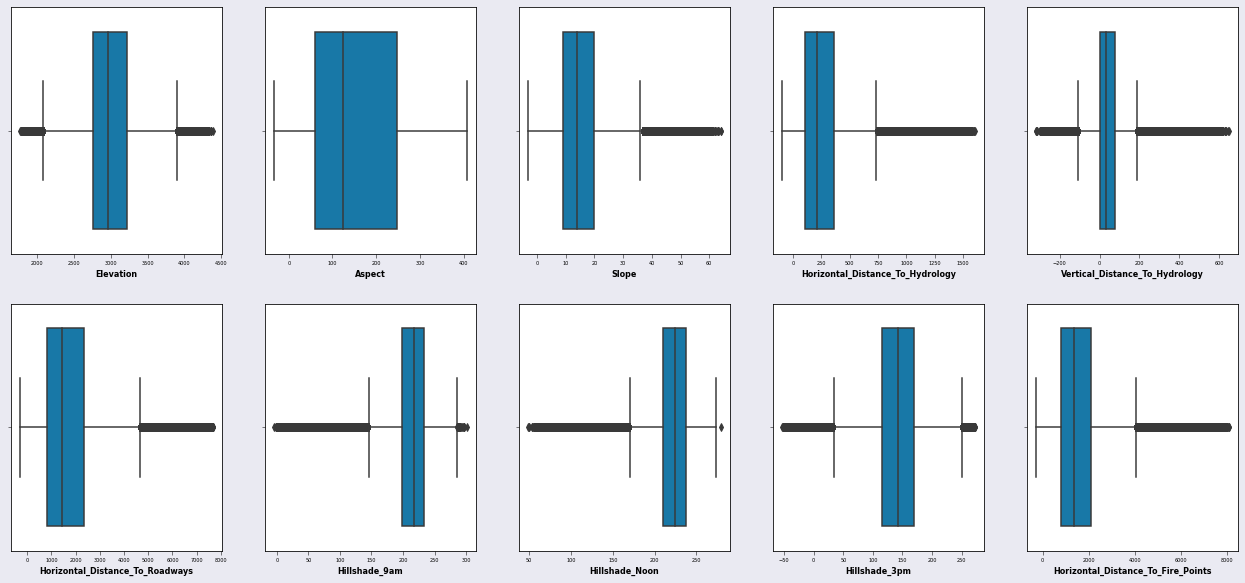

In [23]:
# boxplot for all continous features
ncols = 5
nrows = int(len(cont_features) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.boxplot(x=train[col], ax=axes[r, c], palette='winter')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

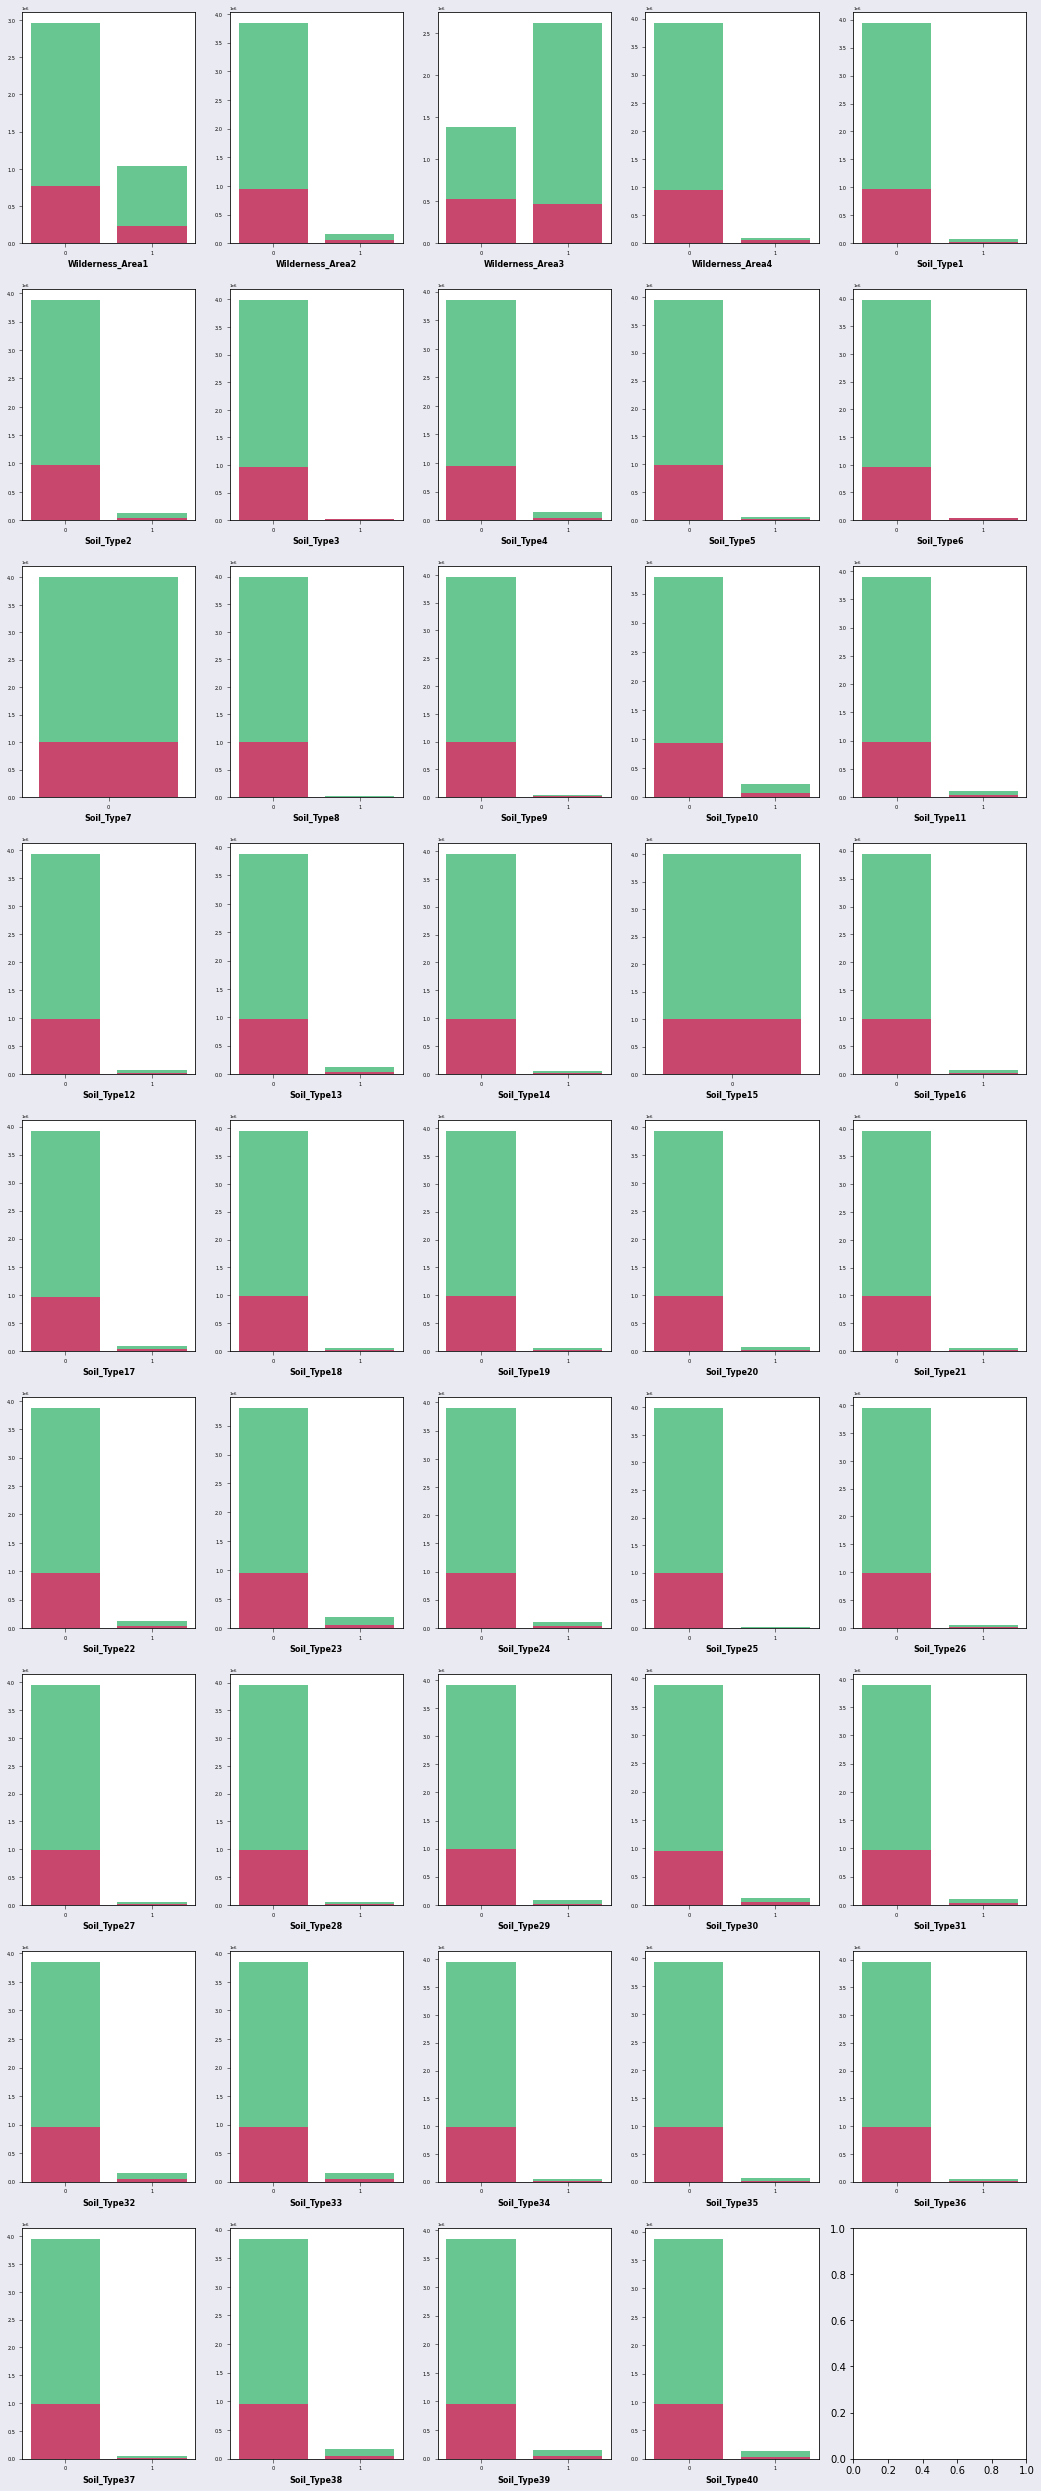

In [24]:
# countplot for all catecorigal columns
if len(cat_features) == 0 :
    print("No Categorical features")
else:
    ncols = 5
    nrows = int(len(cat_features) / ncols + (len(FEATURES) % ncols > 0)) 

    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 45), facecolor='#EAEAF2')

    for r in range(nrows):
        for c in range(ncols):
            if r*ncols+c >= len(cat_features):
                break
            col = cat_features[r*ncols+c]
            sns.countplot(x=train[col], ax=axes[r, c], color='#58D68D', label='Train data')
            sns.countplot(x=test[col], ax=axes[r, c], color='#DE3163', label='Test data')
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
            axes[r, c].tick_params(labelsize=5, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(4)
            axes[r, c].yaxis.offsetText.set_fontsize(4)
    plt.show()

**Soil_type7 and Soil_Type15 are all zero values**

<a id = '4.1'></a>
### Drop Unwanted columns

In [107]:
train = train.drop(index = int(np.where(train["Cover_Type"] == 5 )[0]))
train = train.drop(labels = ["Soil_Type7" , "Soil_Type15"] ,axis = 1)
FEATURES.remove('Soil_Type7')
FEATURES.remove('Soil_Type15')

In [115]:
test = test.drop(labels = ["Soil_Type7" , "Soil_Type15"] ,axis = 1)

In [108]:
train.shape

(3999999, 53)

In [109]:
FEATURES

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

<a id = '5'></a>
# Features Engineering

In [110]:
train[FEATURES].mean()

Elevation                             2980.191667
Aspect                                 151.585680
Slope                                   15.097531
Horizontal_Distance_To_Hydrology       271.315479
Vertical_Distance_To_Hydrology          51.662606
Horizontal_Distance_To_Roadways       1766.641826
Hillshade_9am                          211.837550
Hillshade_Noon                         221.061444
Hillshade_3pm                          140.810863
Horizontal_Distance_To_Fire_Points    1581.405297
Wilderness_Area1                         0.261193
Wilderness_Area2                         0.041661
Wilderness_Area3                         0.653573
Wilderness_Area4                         0.021819
Soil_Type1                               0.016842
Soil_Type2                               0.030896
Soil_Type3                               0.004276
Soil_Type4                               0.037913
Soil_Type5                               0.015715
Soil_Type6                               0.007973


In [111]:
train["mean"] = train[FEATURES].mean(axis=1)
train["std"] = train[FEATURES].std(axis=1)
train["min"] = train[FEATURES].min(axis=1)
train["max"] = train[FEATURES].max(axis=1)

test["mean"] = test[FEATURES].mean(axis=1)
test["std"] = test[FEATURES].std(axis=1)
test["min"] = test[FEATURES].min(axis=1)
test["max"] = test[FEATURES].max(axis=1)

FEATURES.extend(['mean', 'std', 'min', 'max'])

In [112]:
train.shape

(3999999, 57)

In [113]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,mean,std,min,max
0,3189,40,8,30,13,3270,206,234,193,4873,...,0,0,0,0,0,1,231.884615,906.943383,0,4873
1,3026,182,5,280,29,3270,233,240,106,5423,...,0,0,0,0,0,2,246.076923,953.273223,0,5423
2,3106,13,7,351,37,2914,208,234,137,5269,...,0,0,0,0,0,1,236.115385,920.821748,0,5269
3,3022,276,13,192,16,3034,207,238,156,2866,...,0,0,0,0,0,2,192.730769,698.139604,0,3034
4,2906,186,13,266,22,2916,231,231,154,2642,...,0,0,0,0,0,2,184.019231,662.787059,0,2916


In [116]:
test.shape

(1000000, 56)

In [117]:
test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,mean,std,min,max
0,2763,78,20,377,88,3104,218,213,195,1931,...,0,0,0,0,0,0,172.826923,622.011686,0,3104
1,2826,153,11,264,39,295,219,238,148,2557,...,0,0,0,0,0,0,129.826923,523.119329,0,2826
2,2948,57,19,56,44,852,202,217,163,1803,...,0,0,0,0,0,0,122.346154,485.317680,0,2948
3,2926,119,6,158,134,2136,234,240,142,857,...,0,0,0,0,0,0,133.730769,507.166218,0,2926
4,2690,10,4,38,108,3589,213,221,229,431,...,0,0,0,0,0,0,144.903846,616.295201,0,3589


<a id='6'></a>
# Assign Feature and Target variables

In [118]:
# Scalling the features
scaler = StandardScaler()
for col in FEATURES:
    train[col] = scaler.fit_transform(train[col].to_numpy().reshape(-1,1))
    test[col] = scaler.transform(test[col].to_numpy().reshape(-1,1))
    
X = train[FEATURES].to_numpy().astype(np.float32)
y = train['Cover_Type'].to_numpy().astype(np.float32)
X_test = test[FEATURES].to_numpy().astype(np.float32)

In [40]:
X

array([[ 0.7223998 , -1.014774  , -0.83043885, ...,  2.515001  ,
         0.21673077,  2.1103044 ],
       [ 0.15847993,  0.27659157, -1.1814506 , ...,  2.8469377 ,
         0.21673077,  2.8321002 ],
       [ 0.4352504 , -1.2603153 , -0.94744277, ...,  2.6144345 ,
         0.21673077,  2.6299973 ],
       ...,
       [-0.23937763, -0.06898511, -1.6494662 , ...,  1.5593354 ,
         0.21673077,  2.0407495 ],
       [-1.3845155 ,  0.24021508,  0.2225963 , ..., -0.17540489,
         0.21673077, -0.88318014],
       [ 0.3556789 , -0.1417381 , -1.2984545 , ..., -0.22040439,
         0.21673077, -0.23881324]], dtype=float32)

In [41]:
y

array([1., 2., 1., ..., 2., 3., 1.], dtype=float32)

<a id='7'></a>
# ANN

In [42]:
LE = LabelEncoder()
y = to_categorical(LE.fit_transform(y))

<a id='7.1'></a>
## Build and train ANN

In [44]:
X_train , X_valid ,y_train ,y_valid  = train_test_split(X,y , test_size = 0.3 , random_state=0)

def load_model(): 
    model = Sequential([
        Dense(2048, activation = 'swish', input_shape = [X.shape[1]]),
        Dense(1024, activation ='swish'),
        Dense(512, activation ='swish'),
        Dense(6, activation='softmax'),
    ])
    model.compile(
        optimizer= 'adam',
        loss='categorical_crossentropy',
        metrics=['acc'],
    )
    return model
    
    
early_stopping = callbacks.EarlyStopping(
        patience=10,
        min_delta=0,
        monitor='val_loss',
        restore_best_weights=True,
        verbose=0,
        mode='min', 
        baseline=None,
    )
plateau = callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=4, 
            verbose=0,
            mode='min')

nn_model = load_model()
history = nn_model.fit(  X , y,
                validation_data = (X_valid , y_valid),
                batch_size = 2048, 
                epochs = 1000,
                callbacks = [early_stopping , plateau],
              )

Epoch 1/1000
1954/1954 [==============================] - 324s 166ms/step - loss: 0.1225 - acc: 0.9487 - val_loss: 0.1002 - val_acc: 0.9558 - lr: 0.0010
Epoch 2/1000
1954/1954 [==============================] - 351s 180ms/step - loss: 0.0949 - acc: 0.9570 - val_loss: 0.0900 - val_acc: 0.9589 - lr: 0.0010
Epoch 3/1000
1954/1954 [==============================] - 360s 184ms/step - loss: 0.0898 - acc: 0.9587 - val_loss: 0.0869 - val_acc: 0.9596 - lr: 0.0010
Epoch 4/1000
1954/1954 [==============================] - 370s 189ms/step - loss: 0.0868 - acc: 0.9594 - val_loss: 0.0849 - val_acc: 0.9604 - lr: 0.0010
Epoch 5/1000
1954/1954 [==============================] - 377s 193ms/step - loss: 0.0847 - acc: 0.9599 - val_loss: 0.0845 - val_acc: 0.9604 - lr: 0.0010
Epoch 6/1000
1954/1954 [==============================] - 629s 322ms/step - loss: 0.0829 - acc: 0.9606 - val_loss: 0.0808 - val_acc: 0.9615 - lr: 0.0010
Epoch 7/1000
1954/1954 [==============================] - 639s 327ms/step - loss: 

1954/1954 [==============================] - 392s 201ms/step - loss: 0.0138 - acc: 0.9932 - val_loss: 0.0132 - val_acc: 0.9935 - lr: 2.0000e-04
Epoch 107/1000
1954/1954 [==============================] - 392s 201ms/step - loss: 0.0138 - acc: 0.9932 - val_loss: 0.0132 - val_acc: 0.9935 - lr: 2.0000e-04
Epoch 108/1000
1954/1954 [==============================] - 391s 200ms/step - loss: 0.0137 - acc: 0.9932 - val_loss: 0.0129 - val_acc: 0.9937 - lr: 2.0000e-04
Epoch 109/1000
1954/1954 [==============================] - 394s 202ms/step - loss: 0.0136 - acc: 0.9933 - val_loss: 0.0129 - val_acc: 0.9937 - lr: 2.0000e-04
Epoch 110/1000
1954/1954 [==============================] - 395s 202ms/step - loss: 0.0134 - acc: 0.9934 - val_loss: 0.0129 - val_acc: 0.9937 - lr: 2.0000e-04
Epoch 111/1000
1954/1954 [==============================] - 391s 200ms/step - loss: 0.0133 - acc: 0.9934 - val_loss: 0.0127 - val_acc: 0.9938 - lr: 2.0000e-04
Epoch 112/1000
1954/1954 [==============================] - 3

Epoch 158/1000
1954/1954 [==============================] - 574s 294ms/step - loss: 0.0089 - acc: 0.9956 - val_loss: 0.0087 - val_acc: 0.9958 - lr: 4.0000e-05
Epoch 159/1000
1954/1954 [==============================] - 583s 298ms/step - loss: 0.0089 - acc: 0.9956 - val_loss: 0.0086 - val_acc: 0.9958 - lr: 4.0000e-05
Epoch 160/1000
1954/1954 [==============================] - 333s 170ms/step - loss: 0.0088 - acc: 0.9956 - val_loss: 0.0086 - val_acc: 0.9958 - lr: 4.0000e-05
Epoch 161/1000
1954/1954 [==============================] - 356s 182ms/step - loss: 0.0088 - acc: 0.9957 - val_loss: 0.0085 - val_acc: 0.9958 - lr: 4.0000e-05
Epoch 162/1000
1954/1954 [==============================] - 379s 194ms/step - loss: 0.0087 - acc: 0.9957 - val_loss: 0.0085 - val_acc: 0.9959 - lr: 4.0000e-05
Epoch 163/1000
1954/1954 [==============================] - 391s 200ms/step - loss: 0.0087 - acc: 0.9957 - val_loss: 0.0084 - val_acc: 0.9959 - lr: 4.0000e-05
Epoch 164/1000
1954/1954 [====================

<a id='7.2'></a>
## Loss Curve

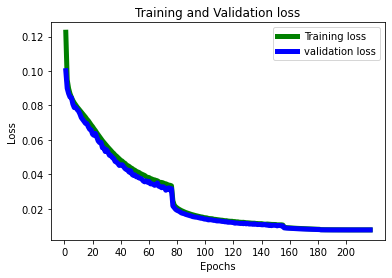

In [49]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,218)
plt.plot(epochs, loss_train, 'g', label='Training loss', lw=5)
plt.plot(epochs, loss_val, 'b', label='validation loss', lw=5)
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,220, 20))
plt.legend()
plt.show()

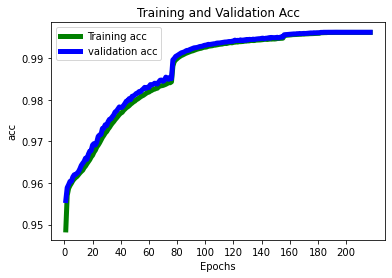

In [51]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,218)
plt.plot(epochs, loss_train, 'g', label='Training acc', lw=5)
plt.plot(epochs, loss_val, 'b', label='validation acc', lw=5)
plt.title('Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.xticks(np.arange(0,220, 20))
plt.legend()
plt.show()

In [61]:
y_predicted = nn_model.predict(X_valid)
y_predicted

array([[1.0000000e+00, 3.5499089e-15, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 3.5192444e-32],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [62]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [63]:
y_predicted_labels = np.array(y_predicted_labels)
y_predicted_labels.shape

(1200000,)

In [64]:
y_valid.shape

(1200000, 6)

In [ ]:
y = np.argmax(y, axis=-1)

In [74]:
y.shape

(3999999,)

In [72]:
X_train , X_valid ,y_train ,y_valid  = train_test_split(X,y , test_size = 0.3 , random_state=0)

In [73]:
y_valid.shape

(1200000,)

In [76]:
cm = tf.math.confusion_matrix(labels=y_valid, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[440570,    105,      0,      0,      0,     38],
       [   109, 676114,   2283,      0,     48,      1],
       [     0,   1760,  56717,      0,     16,      0],
       [     0,      0,      0,    113,      0,      0],
       [     0,     31,     15,      0,   3408,      0],
       [    38,      1,      0,      0,      0,  18633]])>

<a id='7.3'></a>
## Confusion Matrix

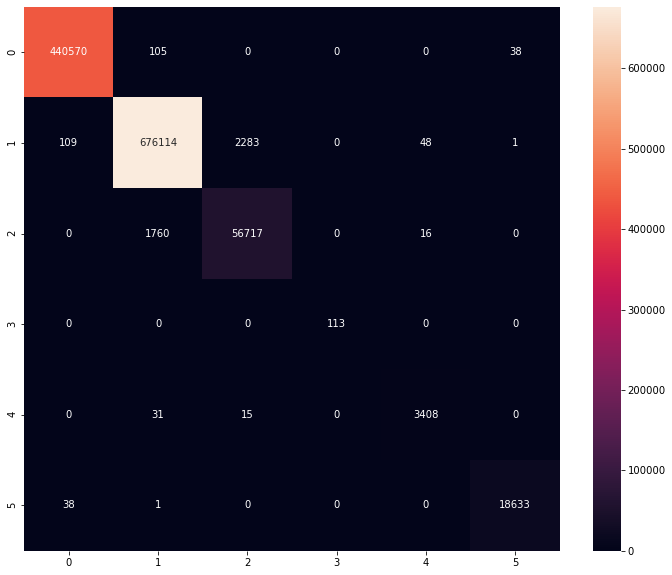

In [79]:
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d');

<a id='7.4'></a>
## Classification Report

In [120]:
print(classification_report(y_valid, y_predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    440713
           1       1.00      1.00      1.00    678555
           2       0.96      0.97      0.97     58493
           3       1.00      1.00      1.00       113
           4       0.98      0.99      0.98      3454
           5       1.00      1.00      1.00     18672

    accuracy                           1.00   1200000
   macro avg       0.99      0.99      0.99   1200000
weighted avg       1.00      1.00      1.00   1200000



<a id='8'></a>
# Sumbission

In [121]:
test.shape

(1000000, 56)

In [122]:
nn_preds = nn_model.predict(test)

In [123]:
submission = pd.read_csv("sample_submission.csv")
nn_submission = submission.copy()
nn_submission["Cover_Type"] = LE.inverse_transform(np.argmax((nn_preds), axis=1)).astype(int)
nn_submission.to_csv("nn-sub.csv" , index= False)
nn_submission.head()

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2
